In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

In [ ]:
file_path = "../data/2- number-of-individuals-employed-in-tourism-related-industries-per-1000-people.csv"

In [11]:
df = pd.read_csv(file_path)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              1393 non-null   object 
 1   Code                                1393 non-null   object 
 2   Year                                1393 non-null   int64  
 3   Employment (total) per 1000 people  1393 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 43.7+ KB


In [13]:
df.head()

,Entity,Code,Year,Employment (total) per 1000 people
0,Albania,ALB,2004,4.897753
1,Albania,ALB,2005,5.144040
2,Albania,ALB,2006,5.560381
3,Albania,ALB,2007,6.182611
4,Albania,ALB,2008,5.928807


In [14]:
df.isnull().sum()

Entity                                0
Code                                  0
Year                                  0
Employment (total) per 1000 people    0
dtype: int64

In [24]:
# Check unique regions
unique_regions = df['Entity'].unique()
unique_regions

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Cameroon',
       'Cayman Islands', 'Chile', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Finland', 'France',
       'French Polynesia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Macao',
       'Madagascar', 'Malaysia', 'Mali', 'Martinique', 'Mauritius',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Nigeria', 'Norway', 'Palestine', 'Pan

### Descriptive Analysis

In [21]:
mean_employment = df['Employment (total) per 1000 people'].mean()
median_employment = df['Employment (total) per 1000 people'].median()
std_employment = df['Employment (total) per 1000 people'].std()

print('Descriptive Statistics:')
print('Mean:', mean_employment)
print('Median:', median_employment)
print('Standard Deviation:', std_employment)

Descriptive Statistics:
Mean: 24.531041439511846
Median: 19.432476
Standard Deviation: 30.188056448545744


In [27]:
# Find the Mean Employment for each Country
country_employment = df.groupby('Entity')['Employment (total) per 1000 people'].mean().reset_index()

In [29]:
# Sort the countries based on employment
sorted_employment = country_employment.sort_values(by='Employment (total) per 1000 people', ascending=False)

In [35]:
# Extract top, middle and buttom countries

top_countries = sorted_employment.head(10)
buttom_countries = sorted_employment.tail(10)
middle_index = len(sorted_employment) // 2
middle_countries = sorted_employment.iloc[middle_index-5:middle_index+5]


In [37]:
# Comnine these subsets for Visualizations

visualization_data = pd.concat([top_countries, middle_countries, buttom_countries])

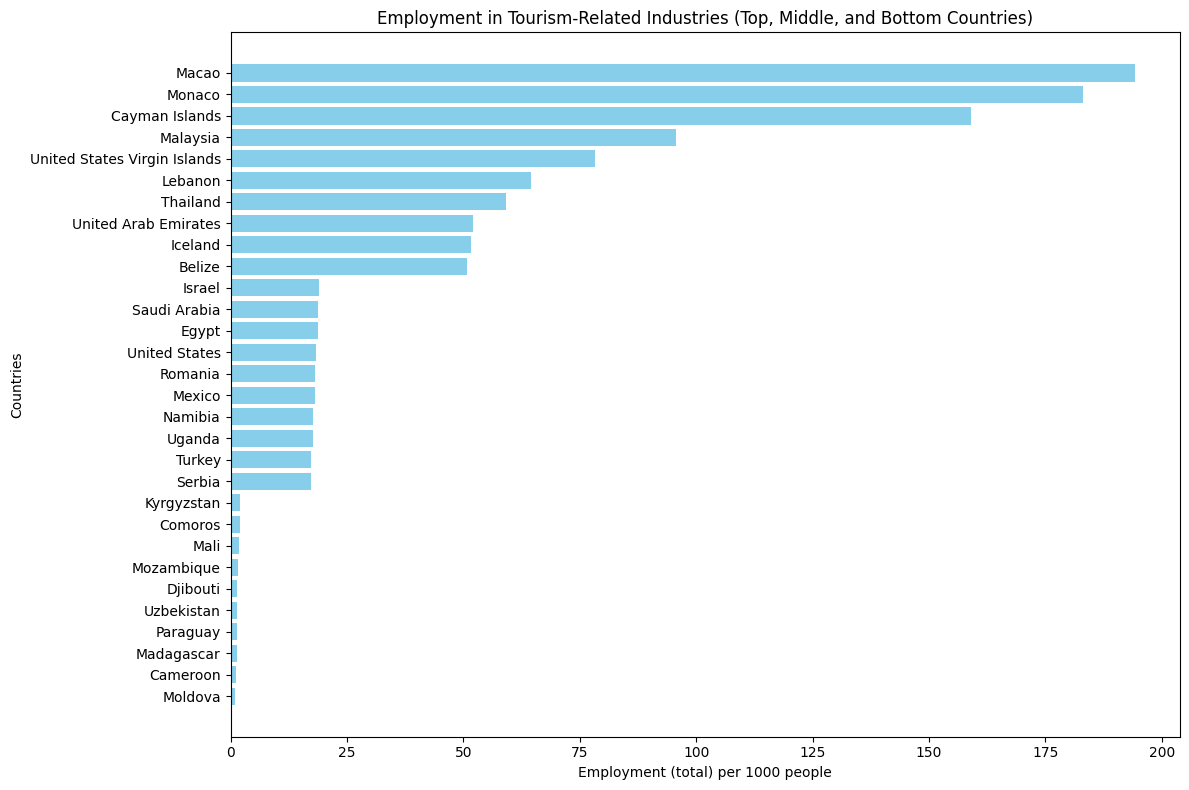

In [43]:
# Plotting
plt.figure(figsize=(12,8))
plt.barh(
    visualization_data['Entity'],
    visualization_data['Employment (total) per 1000 people'],
    color = 'skyblue'
)

plt.xlabel('Employment (total) per 1000 people')
plt.ylabel('Countries')
plt.title('Employment in Tourism-Related Industries (Top, Middle, and Bottom Countries)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

## Key Insights
- The average number of people employed in tourism-related industries per 1,000 people varies significantly across countries.
- Some small island nations exhibit exceptionally high employment in tourism, likely due to their reliance on the industry.
- Countries with lower tourism employment may have more diverse economies or less developed tourism sectors.
- The standard deviation suggests substantial variation among countries, indicating different levels of dependency on tourism.